In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from utils import (
    load_tdm,
    load_vocab,
    train_lda_experiments
)


In [3]:
BASE_DIR = Path("../..")

TRAIN_TDM_PATH = BASE_DIR / "lab2" / "output" / "train_tdm.tsv"
TEST_TDM_PATH  = BASE_DIR / "lab2" / "output" / "test_tdm.tsv"
VOCAB_PATH     = BASE_DIR / "lab2" / "output" / "vocab.txt"

OUTPUT_DIR = BASE_DIR / "lab3-2" / "output"


In [4]:
train_ids, X_train = load_tdm(TRAIN_TDM_PATH)
test_ids,  X_test  = load_tdm(TEST_TDM_PATH)
vocab = load_vocab(VOCAB_PATH)

print("Train documents:", X_train.shape)
print("Test documents:", X_test.shape)
print("Vocabulary size:", len(vocab))


Train documents: (5000, 3000)
Test documents: (1250, 3000)
Vocabulary size: 3000


In [5]:
topic_counts = [2, 5, 10, 20, 40]
MAX_ITER = [10]


In [6]:
results = train_lda_experiments(
    X_train=X_train,
    train_ids=train_ids,
    X_test=X_test,
    vocab=vocab,
    topic_counts=topic_counts,
    output_dir=OUTPUT_DIR,
    max_iter=MAX_ITER
)


[LDA] k=2, perplexity=5138.93
[LDA] k=5, perplexity=6391.02
[LDA] k=10, perplexity=8727.31
[LDA] k=20, perplexity=13709.98
[LDA] k=40, perplexity=27624.66


In [7]:
for res in results:
    print(f"\n===== k = {res['k']} =====")
    for i, topic in enumerate(res["topics"]):
        print(f"Тема {i}: {', '.join(topic)}")



===== k = 2 =====
Тема 0: story, life, time, character, love, great, make, best, year, good
Тема 1: good, really, time, bad, character, make, movie, scene, story, think

===== k = 5 =====
Тема 0: life, story, time, love, character, new, year, make, star, best
Тема 1: good, character, story, really, time, great, make, think, movie, watch
Тема 2: film, scene, people, look, make, time, really, thing, way, character
Тема 3: bad, good, really, time, movie, make, plot, character, thing, scene
Тема 4: story, comedy, time, house, year, great, horror, good, best, old

===== k = 10 =====
Тема 0: life, time, story, star, new, war, character, love, year, family
Тема 1: character, story, time, good, great, make, really, episode, think, way
Тема 2: film, look, life, documentary, character, make, earth, time, scene, people
Тема 3: good, bad, movie, character, school, make, really, great, director, high
Тема 4: series, comedy, year, episode, best, time, great, good, old, story
Тема 5: good, movie, re

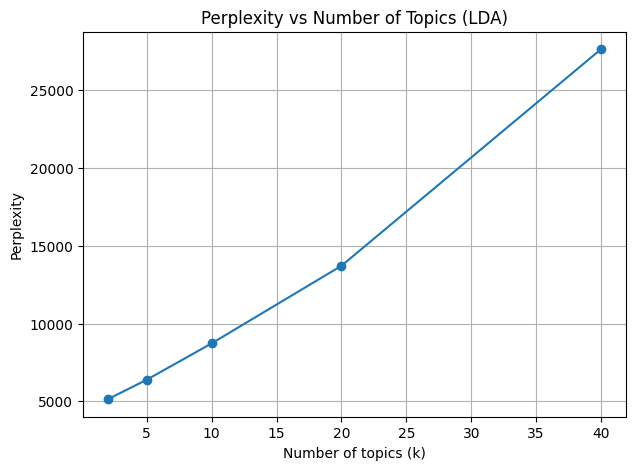

In [8]:
ks = [r["k"] for r in results]
perplexities = [r["perplexity"] for r in results]

plt.figure(figsize=(7, 5))
plt.plot(ks, perplexities, marker='o')
plt.xlabel("Number of topics (k)")
plt.ylabel("Perplexity")
plt.title("Perplexity vs Number of Topics (LDA)")
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import r2_score

best_r2 = -1
best_deg = None
best_poly = None

for deg in range(1, 6):
    coeffs = np.polyfit(ks, perplexities, deg)
    poly = np.poly1d(coeffs)
    pred = poly(ks)
    r2 = r2_score(perplexities, pred)

    print(f"Degree {deg}: R² = {r2:.6f}")

    if r2 > best_r2:
        best_r2 = r2
        best_deg = deg
        best_poly = poly


Degree 1: R² = 0.990776
Degree 2: R² = 0.999895
Degree 3: R² = 0.999990
Degree 4: R² = 1.000000
Degree 5: R² = 1.000000


C:\Users\yaros\AppData\Local\Temp\ipykernel_27968\1384658666.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(ks, perplexities, deg)


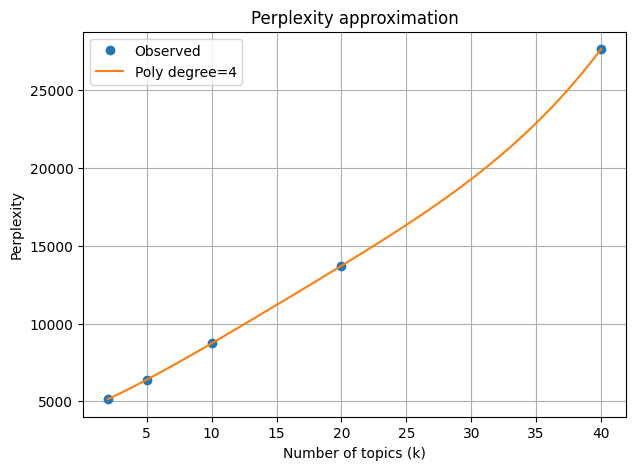

Best polynomial degree: 4, R² = 1.0000


In [10]:
x_dense = np.linspace(min(ks), max(ks), 200)
y_dense = best_poly(x_dense)

plt.figure(figsize=(7, 5))
plt.plot(ks, perplexities, 'o', label="Observed")
plt.plot(x_dense, y_dense, '-', label=f"Poly degree={best_deg}")
plt.xlabel("Number of topics (k)")
plt.ylabel("Perplexity")
plt.title("Perplexity approximation")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best polynomial degree: {best_deg}, R² = {best_r2:.4f}")


# Test

In [11]:
topic_counts_test = [2, 10, 20]
MAX_ITER_TEST = [5, 10, 20]
results_test = train_lda_experiments(
    X_train=X_train,
    train_ids=train_ids,
    X_test=X_test,
    vocab=vocab,
    topic_counts=topic_counts_test,
    output_dir=OUTPUT_DIR,
    max_iter=MAX_ITER_TEST,
    need_safe=False
)


[LDA] k=2, perplexity=5141.34
[LDA] k=2, perplexity=5138.93
[LDA] k=2, perplexity=5133.01
[LDA] k=10, perplexity=9267.71
[LDA] k=10, perplexity=8727.31
[LDA] k=10, perplexity=8279.22
[LDA] k=20, perplexity=16135.02
[LDA] k=20, perplexity=13709.98
[LDA] k=20, perplexity=12147.88


In [12]:
for res in results_test:
    print(f"\n===== k = {res['k']} ===== {res['max_iter'] = } =====")
    for i, topic in enumerate(res["topics"]):
        print(f"Тема {i}: {', '.join(topic)}")


===== k = 2 ===== res['max_iter'] = 5 =====
Тема 0: story, time, life, character, love, make, great, good, year, people
Тема 1: good, time, really, character, bad, make, story, scene, movie, thing

===== k = 2 ===== res['max_iter'] = 10 =====
Тема 0: story, life, time, character, love, great, make, best, year, good
Тема 1: good, really, time, bad, character, make, movie, scene, story, think

===== k = 2 ===== res['max_iter'] = 20 =====
Тема 0: story, life, time, character, love, great, best, year, make, good
Тема 1: good, really, bad, time, character, make, movie, scene, think, thing

===== k = 10 ===== res['max_iter'] = 5 =====
Тема 0: life, time, story, character, star, love, new, make, year, people
Тема 1: character, good, time, story, really, great, make, think, way, episode
Тема 2: look, character, film, really, make, scene, story, life, people, time
Тема 3: movie, bad, good, character, really, great, time, school, make, want
Тема 4: series, story, good, year, comedy, episode, gr